In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
import re
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirilltiufanov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
all_data = pd.read_csv("data/all_data_m.csv")

In [3]:
all_data.iloc[5]

time                                                      2021-01-02
time.1                                                             6
tweetl_t           If 2020 taught us anything, it's allocate 1-5%...
mentions_t                                                        []
replies_count_t                                                 16.0
                                         ...                        
open                                                        0.007216
high                                                        0.007349
low                                                         0.006674
tv                                                                -5
Volume                                                    60681934.0
Name: 5, Length: 417, dtype: object

In [4]:
all_data["tv"].value_counts()

 0    376
 5    375
-5    330
-2    302
 2    291
 1    283
-1    264
-3    212
 3    150
 4    112
-4    103
Name: tv, dtype: int64

In [5]:
all_data_num = all_data.drop(["tweetl_t", "tweetl_l", "mentions_t", "mentions_l"], axis=1)

In [6]:
all_data_num

,time,time.1,replies_count_t,retweets_count_t,top_tw_t,likes_count_t,dogecoin_t,dogearmy_t,elonmusk_t,buy_t,...,ladybug_l,already_l,gt_l,subj_l,polar_l,open,high,low,tv,Volume
0,2021-01-02,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.211310,-0.022321,0.005818,0.005854,0.005564,-3,11123815.0
1,2021-01-02,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0.275884,0.159802,0.005754,0.006431,0.005701,5,32955177.0
2,2021-01-02,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.270291,0.081823,0.006353,0.006791,0.006066,5,108807546.0
3,2021-01-02,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0.194629,0.081690,0.006670,0.007981,0.006654,5,166272032.0
4,2021-01-02,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,0.312392,0.148775,0.007756,0.007776,0.006965,-5,90792179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,2021-04-28,20,2251.0,2496.0,8.0,2778.0,3.0,2.0,0.0,0.0,...,0,4,2,0.351290,0.128267,0.310310,0.310760,0.301330,-3,19680380.6
2794,2021-04-28,21,745.0,916.0,6.0,1263.0,1.0,1.0,2.0,0.0,...,2,0,4,0.297367,0.109041,0.306520,0.315320,0.304800,3,20889588.2
2795,2021-04-28,22,597.0,1780.0,12.0,6635.0,2.0,0.0,3.0,0.0,...,6,4,5,0.366854,0.123385,0.310590,0.326530,0.308500,5,32387298.2
2796,2021-04-28,23,365.0,2242.0,13.0,11403.0,4.0,2.0,2.0,0.0,...,2,3,6,0.357807,0.165924,0.321110,0.326890,0.316570,2,33777982.1


In [7]:
all_data_num = all_data_num.iloc[:,2:-1].apply(pd.to_numeric)

In [8]:
X = all_data_num.drop(columns='tv')
y = all_data_num['tv']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['tv'])
y_test  = pd.DataFrame(y_test, columns =['tv'])

In [10]:
y_train["tv"].value_counts()

 5    276
 0    271
-5    229
-2    209
 1    200
 2    198
-1    179
-3    141
 3    104
 4     83
-4     68
Name: tv, dtype: int64

<AxesSubplot:xlabel='tv', ylabel='count'>

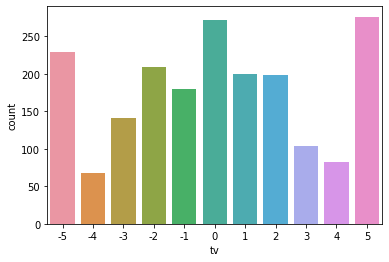

In [11]:
sns.countplot(x=y_train['tv'])

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y.value_counts()

 0    376
 5    375
-5    330
-2    302
 2    291
 1    283
-1    264
-3    212
 3    150
 4    112
-4    103
Name: tv, dtype: int64

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
nb = CategoricalNB()
rf = RandomForestClassifier()

nb.fit(X_sm, y_sm['tv'])
rf.fit(X_sm, y_sm['tv'])

RandomForestClassifier()

In [14]:
y_train_res_pred_rf = rf.predict(X_sm)
y_test_pred_rf      = rf.predict(X_test)

In [15]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))


In [16]:
model_performance_class(y_sm, y_train_res_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

          -5       1.00      1.00      1.00       276
          -4       1.00      1.00      1.00       276
          -3       1.00      1.00      1.00       276
          -2       1.00      1.00      1.00       276
          -1       1.00      1.00      1.00       276
           0       1.00      1.00      1.00       276
           1       1.00      1.00      1.00       276
           2       1.00      1.00      1.00       276
           3       1.00      1.00      1.00       276
           4       1.00      1.00      1.00       276
           5       1.00      1.00      1.00       276

    accuracy                           1.00      3036
   macro avg       1.00      1.00      1.00      3036
weighted avg       1.00      1.00      1.00      3036

Results obtained for the TEST SET
The Cohen's Kappa is: 0.04
              precision    recall  f1-score   support

         